In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

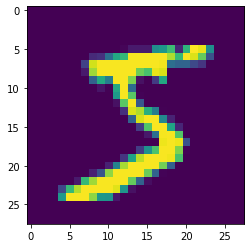

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_zeros = x_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.models import Sequential

In [10]:
descriminator = Sequential()
descriminator.add(Flatten(input_shape=(28,28)))
descriminator.add(Dense(150,activation='relu'))
descriminator.add(Dense(100,activation='relu'))
descriminator.add(Dense(1,activation='sigmoid'))
descriminator.compile(loss='binary_crossentropy',optimizer='adam')


In [11]:
coading_size = 100

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coading_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape(target_shape=(28,28)))


In [12]:
GAN = Sequential([generator,descriminator])

In [13]:
descriminator.trainable = False

In [14]:
GAN.compile(loss='binary_crossentropy',optimizer = 'adam')

In [15]:
batch_size = 32
my_data = only_zeros

In [16]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [17]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [18]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [19]:
epochs = 5

In [20]:
GAN.layers

In [21]:
GAN.layers[0].layers

In [22]:
GAN.layers[1].layers

In [23]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [24]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [25]:
generator , descriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    for X_batch in dataset:
        i+=1
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
        # Discriminator training Phase
        noise = tf.random.normal(shape=[batch_size,coading_size])

        gen_images = generator(noise)

        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)

        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        descriminator.trainable = True
        descriminator.train_on_batch(X_fake_vs_real,y1)

        #Train Ggenerator

        noise = tf.random.normal(shape=[batch_size,coading_size])
        y2 = tf.constant([[1.0]]*batch_size)
        descriminator.trainable = False
        GAN.train_on_batch(noise,y2)

Currently on Epoch 1
	 Currently on batch number 100 of 185
Currently on Epoch 2
	 Currently on batch number 100 of 185
Currently on Epoch 3
	 Currently on batch number 100 of 185
Currently on Epoch 4
	 Currently on batch number 100 of 185
Currently on Epoch 5
	 Currently on batch number 100 of 185


In [26]:
noise = tf.random.normal(shape=[10,coading_size])

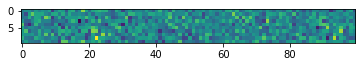

In [27]:
plt.imshow(noise)

In [28]:
images = generator(noise)

In [29]:
images.shape

TensorShape([10, 28, 28])

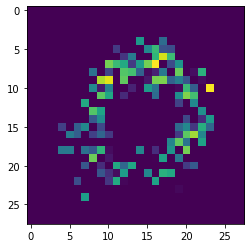

In [30]:
plt.imshow(images[0])

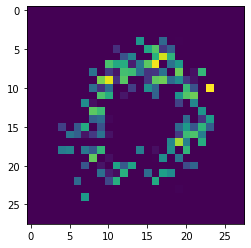

In [31]:
plt.imshow(images[1])

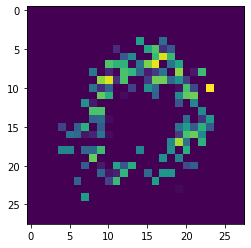

In [32]:
plt.imshow(images[2])

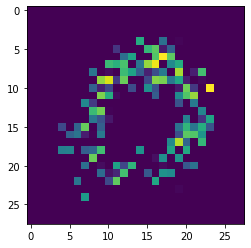

In [33]:
plt.imshow(images[4])

In [34]:

noise = tf.random.normal(shape=[batch_size,coading_size])
gen_images = generator(noise)




In [35]:
gen_images.shape

TensorShape([32, 28, 28])